In [1]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

Downloaded modsim.py


In [2]:
# import functions from modsim

from modsim import *

In [3]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap15.py')

Downloaded chap15.py


In [4]:
# import code from previous notebooks

from chap15 import change_func
from chap15 import run_simulation
from chap15 import make_system

In [5]:
def mix(system1, system2):

    V1, V2 = system1.volume, system2.volume
    T1, T2 = system1.T_final, system2.T_final

    V_mix = V1 + V2
    T_mix = (V1 * T1 + V2 * T2) / V_mix

    return make_system(T_init=T_mix,
                       volume=V_mix,
                       r=system1.r,
                       t_end=30)

In [6]:
r_coffee = 0.0115
coffee = make_system(T_init=90, volume=300, r=r_coffee, t_end=30)

In [7]:
r_milk = 0.133
milk = make_system(T_init=5, volume=50, r=r_milk, t_end=15)

In [8]:
mix_first = mix(coffee, milk)
run_simulation(mix_first, change_func)

mix_first.T_final

61.48016207445017

In [9]:
run_simulation(coffee, change_func)
run_simulation(milk, change_func)
mix_last = mix(coffee, milk)
mix_last.T_final

62.91117032872072

In [10]:
def run_and_mix(t_add, t_total):
    coffee.t_end = t_add
    coffee_results = run_simulation(coffee, change_func)

    milk.t_end = t_add
    milk_results = run_simulation(milk, change_func)

    mixture = mix(coffee, milk)
    mixture.t_end = t_total - t_add
    results = run_simulation(mixture, change_func)

    return mixture.T_final

In [11]:
sweep = SweepSeries()
for t_add in linspace(0, 30, 11):
    sweep[t_add] = run_and_mix(t_add, 30)

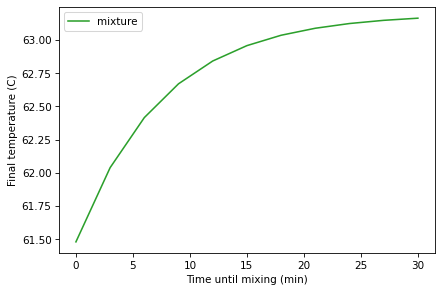

In [12]:
sweep.plot(label='mixture', color='C2')

decorate(xlabel='Time until mixing (min)',
         ylabel='Final temperature (C)')

In [13]:
from numpy import log

def compute_r(system):
    t_end = system.t_end
    T_init = system.T_init
    T_final = system.T_final
    T_env = system.T_env

    r = log((T_init - T_env) / (T_final - T_env)) / t_end
    return r

In [14]:
coffee2 = make_system(T_init=90, volume=300, r=0, t_end=30)
coffee2.T_final = 70
r_coffee2 = compute_r(coffee2)
r_coffee2

0.01161022314227386

In [15]:
from numpy import exp

def run_analysis(system):
    T_env, T_init, r = system.T_env, system.T_init, system.r

    t_array = linrange(system.t_0, system.t_end, system.dt)
    T_array = T_env + (T_init - T_env) * exp(-r * t_array)

    system.T_final = T_array[-1]
    return make_series(t_array, T_array)

In [16]:
coffee2.r = r_coffee2
results2 = run_analysis(coffee2)
coffee2.T_final

70.0

In [17]:
coffee.r = 0.011543
results = run_simulation(coffee, change_func)

In [18]:
from numpy import allclose

allclose(results, results2)

True

### Exercise 1



In [19]:
milk2 = make_system(T_init=5, volume=50, r=0, t_end=15)
milk2.T_final = 20
r_milk2 = compute_r(milk2)
r_milk2

0.14267107756641806

In [20]:
milk = make_system(T_init=5, volume=50, r=0.13296, t_end=15)
results = run_simulation(milk, change_func)


### Exercise 2



In [23]:
# A refrigerator keeps the milk at a constant temperature,
# so it is like a container with r = 0.

# With T_init=5 and r_milk = 0,
# it is best to add the milk at the beginning.